### Import necessary libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### Investigate the dataset

In [72]:
train = pd.read_csv(r"Data\train.csv")
train.sample(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
34055,fffe43004900440032003500300031003600,Norene Clendenin,43,F,1PH0Y2R,Town,Platinum Membership,2015-01-11,Yes,CID40629,...,33.70,38385.65,7.0,NaN,Yes,No,No,Not Applicable,User Friendly Website,2
4401,fffe43004900440033003700320033003800,Palma Bloomfield,26,M,E6SHZDA,Town,Silver Membership,2017-02-25,Yes,CID19147,...,60.22,26709.78,5.0,384.435174,Yes,No,No,Not Applicable,Too many ads,3
22285,fffe43004900440032003300390033003400,Deanna Peery,20,F,IGO2K33,Village,No Membership,2015-10-06,No,xxxxxxxx,...,387.44,47811.04,Error,598.860000,Yes,No,No,Not Applicable,No reason specified,5
8199,fffe4300490044003600360033003800,Lore Plotner,33,F,K5EIUSN,City,Platinum Membership,2016-04-20,Yes,CID43645,...,89.21,23306.53,16.0,735.330000,Yes,No,No,Not Applicable,Poor Product Quality,3
15888,fffe4300490044003700380031003300,Kym Messmer,55,F,334FABN,Town,Silver Membership,2015-06-17,Yes,CID36630,...,39.12,2224.16,10.0,759.650000,No,Yes,No,Not Applicable,No reason specified,3


In [73]:
train_preprocessed = train.copy()

In [74]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [75]:
train_preprocessed.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [76]:
train_preprocessed['churn_risk_score'].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [77]:
train_preprocessed.loc[train_preprocessed['days_since_last_login'] < 0, 'days_since_last_login'] = np.nan
train_preprocessed.loc[train_preprocessed['avg_time_spent'] < 0, 'avg_time_spent'] = np.nan
train_preprocessed.loc[train_preprocessed['points_in_wallet'] < 0, 'points_in_wallet'] = np.nan
train_preprocessed.loc[train_preprocessed['churn_risk_score'] == -1, 'churn_risk_score'] = np.nan

In [78]:
train_preprocessed.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,34993.000000,35273.000000,36992.000000,33413.000000,35829.000000
mean,37.118161,12.758552,292.751466,29271.194003,690.354685,3.608278
std,15.867412,5.572600,331.946382,19444.806226,186.426973,1.176426
min,10.000000,1.000000,1.837399,800.460000,6.432208,1.000000
25%,23.000000,9.000000,71.560000,14177.540000,617.260000,3.000000
50%,37.000000,13.000000,174.180000,27554.485000,698.250000,4.000000
75%,51.000000,17.000000,371.160000,40855.110000,764.260000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


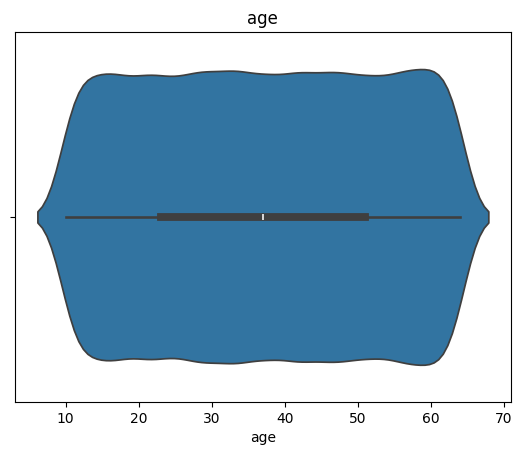

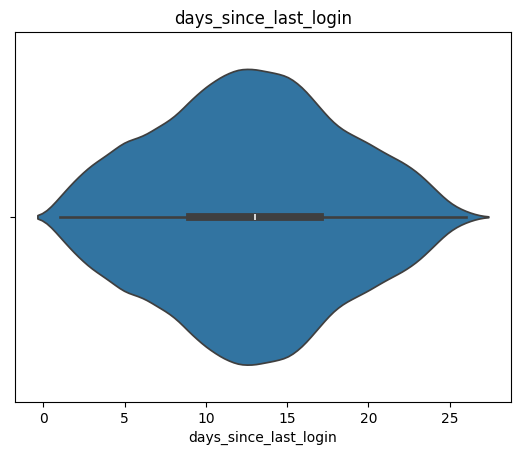

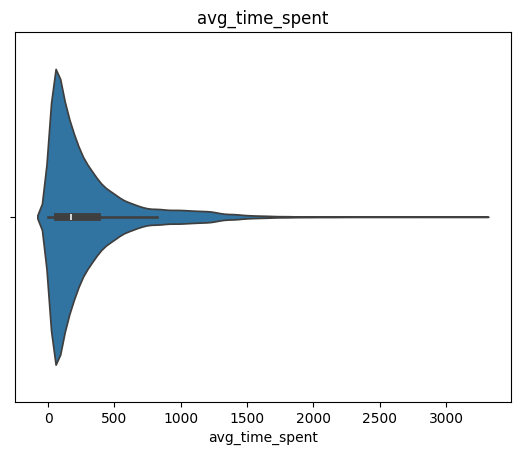

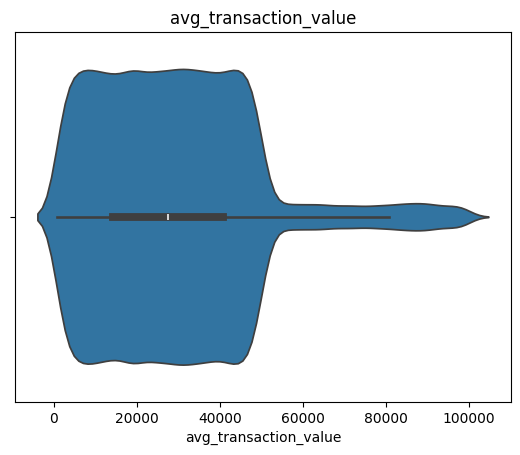

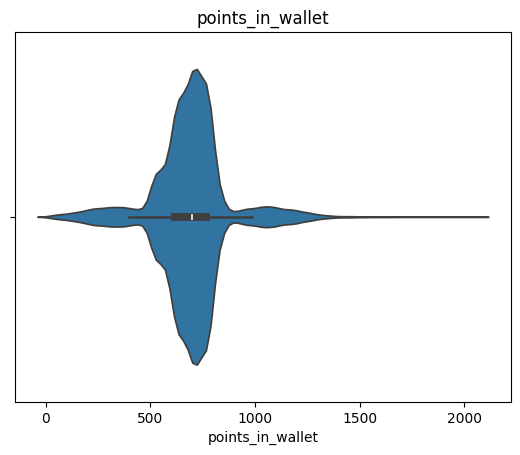

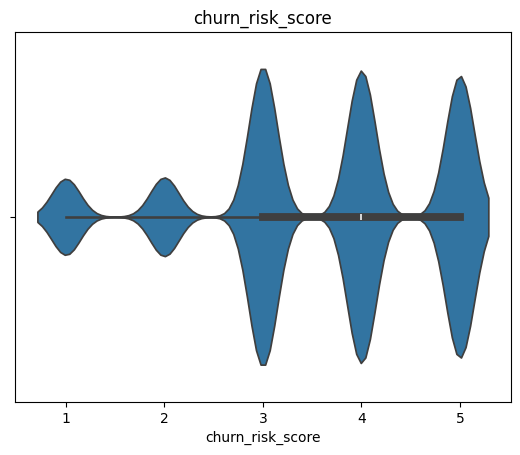

In [79]:
for col in train_preprocessed.describe().columns:
	sns.violinplot(train_preprocessed, x=col)
	plt.title(col)
	plt.show()

In [80]:
# cols_with_outliers = ['avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

Some columns have non-normal and non-uniform distributions. Also, they have outliers; however, I will not cap these outliers because they may introduce an important pattern in the data, for example, if `avg_transaction_value` has some very high values due to VIP customers, capping them may remove valuable patterns.

So, I will apply log transformation to `avg_time_spent` to make it look more normal as it's right-skewed.

In [81]:
# log1p(x) = log(x + 1): this avoids errors when x = 0
train_preprocessed['log_avg_time_spent'] = np.log1p(train_preprocessed['avg_time_spent'])

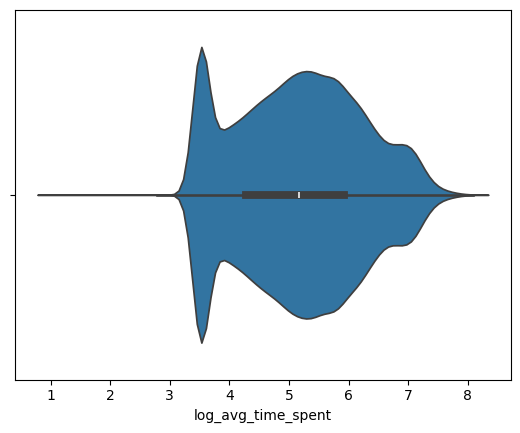

In [82]:
sns.violinplot(train_preprocessed, x='log_avg_time_spent')
plt.show()

In [83]:
for col in train_preprocessed.select_dtypes(include='object').columns:
	print(train_preprocessed[col].value_counts(normalize=True, dropna=False))
	print('-'*50)

customer_id
fffe4300490044003600300030003800        0.000027
fffe43004900440033003400330032003000    0.000027
fffe43004900440032003300340031003500    0.000027
fffe43004900440035003300380031003700    0.000027
fffe43004900440031003800300034003500    0.000027
                                          ...   
fffe43004900440034003900380033003700    0.000027
fffe43004900440031003400330031003900    0.000027
fffe43004900440032003900340031003700    0.000027
fffe43004900440033003100350038003400    0.000027
fffe43004900440033003600340034003200    0.000027
Name: proportion, Length: 36992, dtype: float64
--------------------------------------------------
Name
Pattie Morrisey     0.000027
Brandon Casiano     0.000027
Merideth Gebo       0.000027
Neville Goodwill    0.000027
Sol Siemers         0.000027
                      ...   
Gina Hintzen        0.000027
Kizzy Ramos         0.000027
Earlie Spalla       0.000027
Vinnie Talley       0.000027
Verlene Beaulieu    0.000027
Name: proportion, Length: 

In [84]:
# drop 'avg_frequency_login_days' because most of it is missing
cols_to_drop = ['customer_id', 'Name', 'security_no', 'referral_id', 'avg_frequency_login_days']
cat_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
			'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
# last_visit_time → categories: morning & evening, ...

date_cols = [('joining_date', '%Y-%m-%d'), ('last_visit_time', '%H:%M:%S')]

In [85]:
train_preprocessed.loc[train_preprocessed['joined_through_referral']=='?', 'joined_through_referral'] = np.nan
train_preprocessed.loc[train_preprocessed['medium_of_operation']=='?', 'medium_of_operation'] = np.nan

### Check duplicates

In [86]:
train_preprocessed.duplicated(['customer_id']).sum()

0

### Sanity check

In [87]:
# 'referral_id' should be populated only when 'joined_through_referral' is "Yes"
train_preprocessed['referral_id'].isna().sum()

0

In [88]:
# TODO: There're lots of columns seems to have inconsistent data; how to deal with them?!
wrong_rows = ((train_preprocessed['referral_id'] != 'xxxxxxxx') & (train_preprocessed['joined_through_referral'] == 'No')) | \
				((train_preprocessed['referral_id'] == 'xxxxxxxx') & (train_preprocessed['joined_through_referral'] == 'Yes'))
train_preprocessed.loc[wrong_rows]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,log_avg_time_spent
23,fffe43004900440032003300320035003700,Iliana Gagnier,48,M,GX2SOJ5,Town,Basic Membership,2017-11-10,Yes,xxxxxxxx,...,15860.41,3.2073857931601104,529.03,No,Yes,No,Not Applicable,No reason specified,NaN,4.297557
54,fffe43004900440033003800370031003800,Zelda Labombard,43,M,KJLXRJ7,Town,Premium Membership,2017-04-26,Yes,xxxxxxxx,...,9091.94,20.0,700.40,No,Yes,No,Not Applicable,Poor Product Quality,3.0,6.652644
83,fffe43004900440034003700390034003800,Xenia Kibby,54,M,KUJNEI7,NaN,Basic Membership,2015-08-07,Yes,xxxxxxxx,...,11345.66,7.0,572.41,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,5.0,5.544083
103,fffe43004900440036003000360031003000,Sid Basel,49,F,80X3LBS,Town,Premium Membership,2016-09-02,Yes,xxxxxxxx,...,41156.81,27.0,741.02,No,Yes,No,Not Applicable,Poor Customer Service,3.0,4.757118
114,fffe4300490044003700350032003900,Melinda Tullius,26,M,ELWT1XG,City,Silver Membership,2017-11-14,Yes,xxxxxxxx,...,17002.23,11.0,700.11,No,Yes,No,Not Applicable,Too many ads,3.0,5.241271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36919,fffe43004900440031003200330036003100,Danny Rodriques,35,M,JLZ2E95,Village,No Membership,2015-08-27,Yes,xxxxxxxx,...,18097.99,17.0,672.83,Yes,No,No,Not Applicable,Poor Customer Service,4.0,6.419897
36926,fffe43004900440033003200350033003000,Joyce Robards,59,F,0PQQ85C,City,Basic Membership,2017-12-11,Yes,xxxxxxxx,...,14831.98,Error,682.34,Yes,No,No,Not Applicable,Poor Customer Service,5.0,4.051959
36939,fffe43004900440035003200300030003900,Christiana Troyer,54,F,P2ETOZR,Town,Platinum Membership,2015-03-29,Yes,xxxxxxxx,...,7346.05,13.0,NaN,No,Yes,Yes,Solved,Poor Website,3.0,3.601686
36945,fffe43004900440034003400350033003700,Elden Lecompte,64,M,2J86HFW,Town,Gold Membership,2015-04-25,Yes,xxxxxxxx,...,29127.95,29.0,727.13,Yes,No,No,Not Applicable,Poor Customer Service,3.0,3.503453


### Drop unnecessary cols

In [89]:
train_preprocessed = train_preprocessed.drop(columns=cols_to_drop)

### Adjusting data types

This will reduce the size of the dataset, making preprocessing & ML models takes less time

In [90]:
for cat_col in cat_cols:
	train_preprocessed[cat_col] = train_preprocessed[cat_col].astype('category')

for date_col, date_format in date_cols:
	train_preprocessed[date_col] = pd.to_datetime(train_preprocessed[date_col], format=date_format)

In [91]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  category      
 2   region_category               31564 non-null  category      
 3   membership_category           36992 non-null  category      
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       31554 non-null  category      
 6   preferred_offer_types         36704 non-null  category      
 7   medium_of_operation           31599 non-null  category      
 8   internet_option               36992 non-null  category      
 9   last_visit_time               36992 non-null  datetime64[ns]
 10  days_since_last_login         34993 non-null  float64       
 11  avg_time_spent              

### Check missing values

In [92]:
train_preprocessed.isna().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login           1999
avg_time_spent                  1719
avg_transaction_value              0
points_in_wallet                3579
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                1163
log_avg_time_spent              1719
dtype: int64

In [93]:
train_preprocessed = train_preprocessed.drop(train_preprocessed.loc[train_preprocessed['churn_risk_score'].isna()].index)

In [94]:
train_preprocessed.isna().sum()

age                                0
gender                             0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral         5292
preferred_offer_types            276
medium_of_operation             5230
internet_option                    0
last_visit_time                    0
days_since_last_login           1944
avg_time_spent                  1659
avg_transaction_value              0
points_in_wallet                3475
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
log_avg_time_spent              1659
dtype: int64

In [95]:
cols_with_nans = ['region_category', 'joined_through_referral', 'preferred_offer_types', 
				  'medium_of_operation', 'days_since_last_login', 'points_in_wallet', 'log_avg_time_spent']
cat_cols_with_nans = cols_with_nans[:-3]
num_cols_with_nans = cols_with_nans[-3:]

In [96]:
for col in cols_with_nans:
	print(train_preprocessed[col].value_counts(normalize=True, dropna=False), '\n------------------------')

region_category
Town       0.382428
City       0.343716
NaN        0.146892
Village    0.126964
Name: proportion, dtype: float64 
------------------------
joined_through_referral
No     0.428536
Yes    0.423763
NaN    0.147702
Name: proportion, dtype: float64 
------------------------
preferred_offer_types
Gift Vouchers/Coupons       0.334282
Credit/Debit Card Offers    0.331017
Without Offers              0.326998
NaN                         0.007703
Name: proportion, dtype: float64 
------------------------
medium_of_operation
Desktop       0.376120
Smartphone    0.375227
NaN           0.145971
Both          0.102682
Name: proportion, dtype: float64 
------------------------
days_since_last_login
12.0    0.064389
13.0    0.063859
14.0    0.062128
15.0    0.061626
11.0    0.061263
10.0    0.056518
16.0    0.055877
NaN     0.054258
9.0     0.050267
17.0    0.047141
8.0     0.042675
7.0     0.039242
18.0    0.038656
19.0    0.035586
6.0     0.034106
5.0     0.033213
20.0    0.031818
21.

### Handling missing value approaches

-	`region_category`: It's clear that the frequencies of `Town` and `City` are close, so we will not fill this huge number of missing values (~5500) using a simple method like the **mode** of whole dataset. Instead, a highly correlated feature or a model will be used to predict these missing categories.

-	`preferred_offer_types`, `joined_through_referral`, `medium_of_operation`: same as the `region_category` attribute

-	`days_since_last_login`, `points_in_wallet`, `log_avg_time_spent`: We'll see if there're outliers to determine which filling method is more suitable (**median** or **mean**?). Additionally, we'll check if there other features that correlates with (e.g., wallet points) to build predictive model to estimate missing values as the numbers of missings are quite large. 

First, let's check which features we can use to predict Nans in the categorical attributes 

**Approach**: 

-	We'll make a bar plot between (e.g., `region_category`) and all other numeric features. When all bars are similar, this means that the selected feature isn't important for predicting `region_category`. Otherwise, it may be correlated with `region_category`.

-	We'll group the (e.g., `region_category`) by each categorical variable to see if they correlate or not. 

In [97]:
# similar to plotting a bar plot
for cat_col in cat_cols_with_nans:
	print('-'*50, cat_col, '-'*50)
	for num_col in train_preprocessed.select_dtypes(include='number').columns:
		print(f"Current Column: {num_col}\n{train_preprocessed.groupby(cat_col)[num_col].mean()}\n")

-------------------------------------------------- region_category --------------------------------------------------
Current Column: age
region_category
City       36.988063
Town       37.146256
Village    37.305781
Name: age, dtype: float64

Current Column: days_since_last_login
region_category
City       12.697768
Town       12.804415
Village    12.654723
Name: days_since_last_login, dtype: float64

Current Column: avg_time_spent
region_category
City       293.301891
Town       292.992614
Village    295.314565
Name: avg_time_spent, dtype: float64

Current Column: avg_transaction_value
region_category
City       29155.822944
Town       29111.148784
Village    30571.064111
Name: avg_transaction_value, dtype: float64

Current Column: points_in_wallet
region_category
City       689.837938
Town       690.605940
Village    697.914849
Name: points_in_wallet, dtype: float64

Current Column: churn_risk_score
region_category
City       3.629395
Town       3.620493
Village    3.493075
Name: ch

In [98]:
for cat_col1 in cat_cols_with_nans:
	print('-'*50, cat_col1, '-'*50)
	for cat_col2 in train_preprocessed.select_dtypes(exclude='number').columns:
		print(train_preprocessed.groupby(cat_col2)[cat_col1].value_counts(dropna=False))
		print('-'*50)

-------------------------------------------------- region_category --------------------------------------------------
gender   region_category
F        Town               6863
         City               6142
         nan                2629
         Village            2258
M        Town               6812
         City               6157
         nan                2627
         Village            2285
Unknown  Town                 27
         City                 16
         nan                   7
         Village               6
Name: count, dtype: int64
--------------------------------------------------
region_category
City               0
Town               0
Village            0
Name: count, dtype: int64
--------------------------------------------------
membership_category  region_category
Basic Membership     Town               2859
                     City               2599
                     nan                1120
                     Village             895
Gold Member

joining_date  region_category
2015-01-01    City               14
              Town                6
              nan                 5
              Village             0
2015-01-02    Town               12
                                 ..
2017-12-30    Village             4
2017-12-31    City               15
              Town               15
              nan                 6
              Village             3
Name: count, Length: 4384, dtype: int64
--------------------------------------------------
joined_through_referral  region_category
No                       Town               5886
                         City               5272
                         nan                2214
                         Village            1982
Yes                      Town               5761
                         City               5266
                         nan                2265
                         Village            1891
Name: count, dtype: int64
------------------------

-	It's clear that `region_category` isn't correlated with any feature significantly, so we'll randomly assign missing values based on category probabilities.

-	`preferred_offer_types` can be imputed using the mode of each category in the `membership_category` feature

-	`joined_through_referral` and `medium_of_operation` can be imputed using a model that is trained on `days_since_last_login` and `avg_time_spent` features

In [99]:
categories = train_preprocessed['region_category'].value_counts(normalize=True)
Nan_indecis = train_preprocessed['region_category'].isna()
train_preprocessed.loc[Nan_indecis, 'region_category'] = np.random.choice(categories.index, size=Nan_indecis.sum(), p=categories.values)

In [100]:
train_preprocessed['preferred_offer_types'] = train_preprocessed.groupby('membership_category')['preferred_offer_types'].\
												transform(lambda x: x.fillna(x.mode()[0]))

In [101]:
def fill_cat_feature_modeling(X_train, X_test, y_train):
	rf = RandomForestClassifier(random_state=42)
	rf.fit(X_train, y_train)
	return rf.predict(X_test)

In [102]:
# filling 'joined_through_referral' col
missing_indices_features = (train_preprocessed['days_since_last_login'].isna()) | \
							(train_preprocessed['log_avg_time_spent'].isna())

missing_indices_target = train_preprocessed['joined_through_referral'].isna()

X_train = train_preprocessed.loc[~missing_indices_features & ~missing_indices_target, ['days_since_last_login', 'log_avg_time_spent']]

y_train = train_preprocessed.loc[~missing_indices_features & ~missing_indices_target, 'joined_through_referral']

X_test = train_preprocessed.loc[~missing_indices_features & missing_indices_target, ['days_since_last_login', 'log_avg_time_spent']]

y_pred = fill_cat_feature_modeling(X_train, X_test, y_train)

train_preprocessed.loc[~missing_indices_features & missing_indices_target, 'joined_through_referral'] = y_pred

In [103]:
# filling 'medium_of_operation' col
missing_indices_target = train_preprocessed['medium_of_operation'].isna()

X_train = train_preprocessed.loc[~missing_indices_features & ~missing_indices_target, ['days_since_last_login', 'log_avg_time_spent']]

y_train = train_preprocessed.loc[~missing_indices_features & ~missing_indices_target, 'medium_of_operation']

X_test = train_preprocessed.loc[~missing_indices_features & missing_indices_target, ['days_since_last_login', 'log_avg_time_spent']]

y_pred = fill_cat_feature_modeling(X_train, X_test, y_train)

train_preprocessed.loc[~missing_indices_features & missing_indices_target, 'medium_of_operation'] = y_pred

In [104]:
# check
for cat_col in cat_cols_with_nans:
	print(train_preprocessed[cat_col].value_counts(dropna=False), '\n')

region_category
Town       16077
City       14421
Village     5331
Name: count, dtype: int64 

joined_through_referral
No     17777
Yes    17509
NaN      543
Name: count, dtype: int64 

preferred_offer_types
Gift Vouchers/Coupons       12103
Credit/Debit Card Offers    11892
Without Offers              11834
Name: count, dtype: int64 

medium_of_operation
Desktop       15542
Smartphone    15529
Both           4259
NaN             499
Name: count, dtype: int64 



In [105]:
# let's the remaining Nans with the mode
for cat_col in cat_cols_with_nans:
	train_preprocessed[cat_col].fillna(train_preprocessed[cat_col].mode()[0], inplace=True)

Second, let's check which features we can use to predict Nans in the numerical attributes: 

**Approach**: 

-	We'll print the correlations and make a scatter plot between (e.g., `points_in_wallet`) and all other numeric features to see which features correlate with `points_in_wallet`.

-	We'll group the (e.g., `points_in_wallet`) by each categorical variable to see if they correlate or not. 

In [106]:
for col in num_cols_with_nans:
	print('-'*30 + col + '-'*30)
	print(train_preprocessed.select_dtypes(include='number').corr()[col])

------------------------------days_since_last_login------------------------------
age                     -0.002340
days_since_last_login    1.000000
avg_time_spent          -0.113399
avg_transaction_value   -0.016342
points_in_wallet        -0.000976
churn_risk_score         0.030910
log_avg_time_spent      -0.124376
Name: days_since_last_login, dtype: float64
------------------------------points_in_wallet------------------------------
age                      0.001846
days_since_last_login   -0.000976
avg_time_spent          -0.002501
avg_transaction_value    0.091537
points_in_wallet         1.000000
churn_risk_score        -0.335261
log_avg_time_spent      -0.000519
Name: points_in_wallet, dtype: float64
------------------------------log_avg_time_spent------------------------------
age                      0.000413
days_since_last_login   -0.124376
avg_time_spent           0.856031
avg_transaction_value    0.026744
points_in_wallet        -0.000519
churn_risk_score        -0.036378

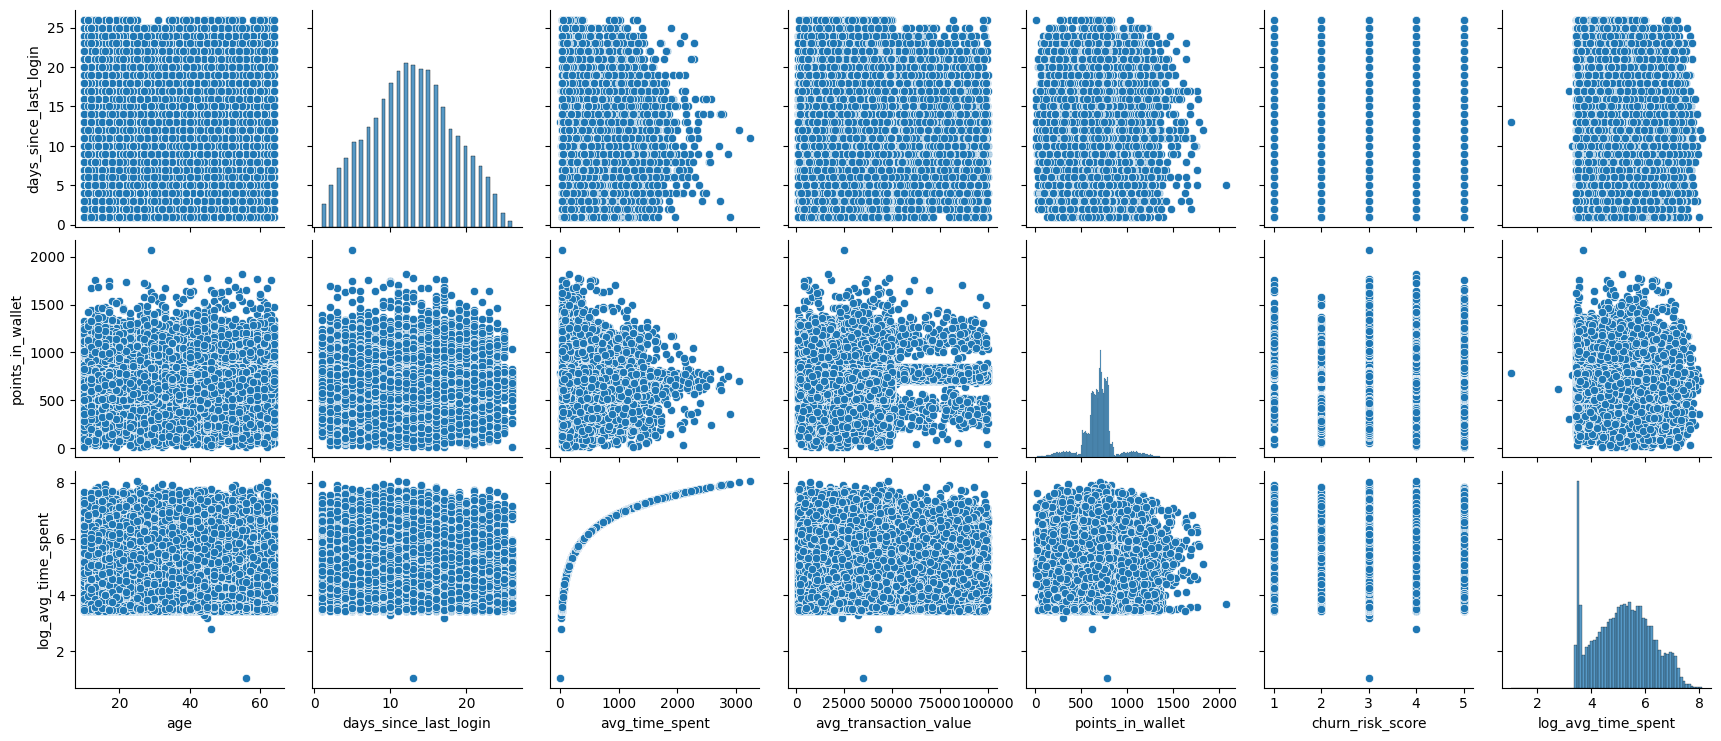

In [107]:
sns.pairplot(train_preprocessed, y_vars=num_cols_with_nans)
plt.show()

In [108]:
for num_col in num_cols_with_nans:
	print('-'*50, num_col, '-'*50)
	for cat_col in train_preprocessed.select_dtypes(exclude='number').columns:
		print(train_preprocessed.groupby(cat_col)[num_col].mean())
		print('-'*50)

-------------------------------------------------- days_since_last_login --------------------------------------------------
gender
F          12.759894
M          12.742536
Unknown    12.880000
Name: days_since_last_login, dtype: float64
--------------------------------------------------
region_category
City       12.707124
Town       12.818804
Village    12.668187
Name: days_since_last_login, dtype: float64
--------------------------------------------------
membership_category
Basic Membership       12.922142
Gold Membership        12.679588
No Membership          12.809855
Platinum Membership    12.674705
Premium Membership     12.624112
Silver Membership      12.687990
Name: days_since_last_login, dtype: float64
--------------------------------------------------
joining_date
2015-01-01    12.217391
2015-01-02    13.517241
2015-01-03    12.909091
2015-01-04    13.656250
2015-01-05    13.150000
                ...    
2017-12-27    12.655172
2017-12-28    13.695652
2017-12-29    13.03

From the previous analysis:

-	`membership_category` and `feedback` are the most relevant features to predict Nans in `points_in_wallet`

-	In `log_avg_time_spent` and `days_since_last_login`, we will fill Nans with the median because it seems that no feature correlate with them significantly. (we'll use median, not mean, due to outliers) 

In [109]:
def fill_num_feature_modeling(X_train, X_test, y_train):
	X_train = pd.get_dummies(X_train, dtype=int, drop_first=True)
	X_test = pd.get_dummies(X_test, dtype=int, drop_first=True)
	rf = RandomForestRegressor(random_state=42)
	rf.fit(X_train, y_train)
	return rf.predict(X_test)

In [110]:
# filling 'points_in_wallet' col
X_train = train_preprocessed.loc[train_preprocessed['points_in_wallet'].notna(), ['membership_category', 'feedback']]
y_train = train_preprocessed.loc[train_preprocessed['points_in_wallet'].notna(), 'points_in_wallet']
X_test = train_preprocessed.loc[train_preprocessed['points_in_wallet'].isna(), ['membership_category', 'feedback']]
y_pred = fill_num_feature_modeling(X_train, X_test, y_train)
train_preprocessed.loc[train_preprocessed['points_in_wallet'].isna(), 'points_in_wallet'] = y_pred

In [111]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 36991
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           35829 non-null  int64         
 1   gender                        35829 non-null  category      
 2   region_category               35829 non-null  category      
 3   membership_category           35829 non-null  category      
 4   joining_date                  35829 non-null  datetime64[ns]
 5   joined_through_referral       35829 non-null  category      
 6   preferred_offer_types         35829 non-null  category      
 7   medium_of_operation           35829 non-null  category      
 8   internet_option               35829 non-null  category      
 9   last_visit_time               35829 non-null  datetime64[ns]
 10  days_since_last_login         33885 non-null  float64       
 11  avg_time_spent                341

In [112]:
train_preprocessed.isna().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login           1944
avg_time_spent                  1659
avg_transaction_value              0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
log_avg_time_spent              1659
dtype: int64

In [113]:
for num_col in num_cols_with_nans:
	train_preprocessed[num_col].fillna(train_preprocessed[num_col].median(), inplace=True)

In [114]:
train_preprocessed.isna().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                  1659
avg_transaction_value              0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
log_avg_time_spent                 0
dtype: int64

# Feature Engineering

In [115]:
train_preprocessed.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'log_avg_time_spent'],
      dtype='object')

In [116]:
train_preprocessed.select_dtypes('number').columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'log_avg_time_spent'],
      dtype='object')

### Extracting features

In [117]:
train_preprocessed['points_per_transaction'] = train_preprocessed['points_in_wallet'] / train_preprocessed['avg_transaction_value']
train_preprocessed['transaction_value_per_time_unit'] = train_preprocessed['avg_transaction_value'] / train_preprocessed['log_avg_time_spent']

In [118]:
def time_of_day(hour):
	if 5 <= hour < 12:
		return 'Morning'
	elif 12 <= hour < 17:
		return 'Afternoon'
	elif 17 <= hour < 21:
		return 'Evening'
	else:
		return 'Night'

In [119]:
train_preprocessed['last_visit_hour'] = train_preprocessed['last_visit_time'].dt.hour
train_preprocessed['last_visit_time_of_day'] = train_preprocessed['last_visit_hour'].apply(time_of_day).astype('category')

### Save data (ready for visualization & dashboards)

In [120]:
train_preprocessed.isna().sum()

age                                   0
gender                                0
region_category                       0
membership_category                   0
joining_date                          0
joined_through_referral               0
preferred_offer_types                 0
medium_of_operation                   0
internet_option                       0
last_visit_time                       0
days_since_last_login                 0
avg_time_spent                     1659
avg_transaction_value                 0
points_in_wallet                      0
used_special_discount                 0
offer_application_preference          0
past_complaint                        0
complaint_status                      0
feedback                              0
churn_risk_score                      0
log_avg_time_spent                    0
points_per_transaction                0
transaction_value_per_time_unit       0
last_visit_hour                       0
last_visit_time_of_day                0


In [121]:
train_preprocessed['avg_time_spent'] = train_preprocessed['log_avg_time_spent'].fillna(np.exp(train_preprocessed['log_avg_time_spent']))

In [122]:
train_preprocessed.to_csv(r'Data\train_cleaned.csv', index=False)

### Encoding categorical variables

In [123]:
for col in train_preprocessed.select_dtypes(exclude='number').columns:
	print(f'{col} Column', '-'*50)
	print(train_preprocessed[col].unique())

gender Column --------------------------------------------------
['F', 'M', 'Unknown']
Categories (3, object): ['F', 'M', 'Unknown']
region_category Column --------------------------------------------------
['Village', 'City', 'Town']
Categories (3, object): ['City', 'Town', 'Village']
membership_category Column --------------------------------------------------
['Platinum Membership', 'Premium Membership', 'No Membership', 'Gold Membership', 'Silver Membership', 'Basic Membership']
Categories (6, object): ['Basic Membership', 'Gold Membership', 'No Membership', 'Platinum Membership', 'Premium Membership', 'Silver Membership']
joining_date Column --------------------------------------------------
<DatetimeArray>
['2017-08-17 00:00:00', '2017-08-28 00:00:00', '2016-11-11 00:00:00',
 '2016-10-29 00:00:00', '2017-09-12 00:00:00', '2016-01-08 00:00:00',
 '2015-03-19 00:00:00', '2016-07-12 00:00:00', '2016-12-14 00:00:00',
 '2016-11-30 00:00:00',
 ...
 '2016-07-20 00:00:00', '2016-07-31 00:

##### Binary Encoding

In [124]:
binary_cols = ['gender', 'joined_through_referral', 'used_special_discount', 'offer_application_preference', 'past_complaint']
for col in binary_cols:
	train_preprocessed[col] = train_preprocessed[col].map({'F':0, 'Unknown':0.5, 'M':1, 'No':0, 'Yes':1})

##### Ordinal Encoding

In [125]:
# ordinal_cols = ['membership_category', 'feedback']
train_preprocessed['membership_category'] = pd.Categorical(train_preprocessed['membership_category'], 
														   categories=['No Membership', 'Basic Membership', 'Silver Membership', 
																	   'Gold Membership', 'Platinum Membership', 'Premium Membership'],
															ordered=True).codes

In [126]:
positive_feedback = ['Products always in Stock', 'Quality Customer Care', 'Reasonable Price', 'User Friendly Website']
negative_feedback = ['Poor Website' ,'Poor Customer Service', 'Poor Product Quality', 'Too many ads']
neutral_feedback = ['No reason specified']

def get_sentiment(feedback):
	if feedback in positive_feedback:
		return 2
	elif feedback in negative_feedback:
		return 0
	else:
		return 1 # neutral
	
train_preprocessed['feedback'] = train_preprocessed['feedback'].transform(get_sentiment)

##### One-Hot Encoding

In [127]:
cat_cols = ['region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time_of_day', 'complaint_status']
train_preprocessed = pd.get_dummies(train_preprocessed, columns=cat_cols, drop_first=True, dtype=int)

### Feature selection

In [128]:
X = train_preprocessed.drop(columns=['churn_risk_score', 'joining_date', 'last_visit_time'])
y = train_preprocessed['churn_risk_score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [129]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [130]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [131]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature':feature_names, 'importance':importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index()
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()
feature_importance_df

,index,feature,importance,cumulative_importance
0,7,points_in_wallet,0.261408,0.261408
1,2,membership_category,0.223883,0.485290
2,11,feedback,0.109169,0.594459
3,6,avg_transaction_value,0.062499,0.656957
4,13,points_per_transaction,0.056153,0.713111
5,14,transaction_value_per_time_unit,0.045672,0.758783
6,5,avg_time_spent,0.033329,0.792112
7,12,log_avg_time_spent,0.033148,0.825260
8,0,age,0.031815,0.857075
9,4,days_since_last_login,0.026764,0.883839


In [132]:
# let's select the first 10 features where they have importance of around 90%
important_features = feature_importance_df.iloc[:10]['index'].tolist()
X_train_selected = X_train[:, important_features]
X_val_selected = X_val[:, important_features]

In [133]:
rf_selected = RandomForestClassifier(random_state=42).fit(X_train_selected, y_train)

full_score = rf.score(X_val, y_val)
selected_score = rf_selected.score(X_val_selected, y_val)

print(f"accuracy (before feature selection): {full_score:.4f}")
print(f"accuracy (after feature selection): {selected_score:.4f}")

accuracy (before feature selection): 0.7752
accuracy (after feature selection): 0.7781


### Save data (ready for modeling)

In [134]:
train_preprocessed.to_csv(r'Data\train_cleaned_encoded.csv', index=False)